In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [3]:
tbl = pd.read_excel(r'C:\Users\tyagir01\Desktop\Data Analytics Problem Set\Emp_pay.xlsx')
tbl

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Relation b/w Salary & Experience')

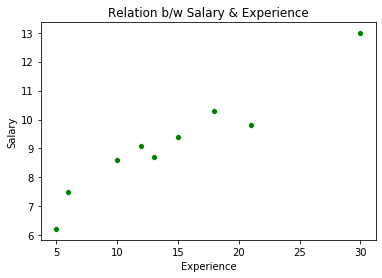

In [4]:
sns.scatterplot(tbl['Experience'], tbl['Salary'], color='green')
plt.title('Relation b/w Salary & Experience')

In [8]:
#plt.scatter(tbl['Experience'],tbl['Salary'], color = "orange")
#plt.ylabel('Salary')
#plt.title('LR with Dominant Variable')

In [5]:
rgr = ols(formula = 'Salary ~ Experience', data = tbl).fit()
print(rgr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           3.30e-05
Time:                        12:50:32   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\tyagir01\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


### Error analysis (of Residuals)

In [6]:
rsdl = rgr.get_influence().resid_studentized_external

Text(0.5, 1.0, 'Standardized Residual Plot')

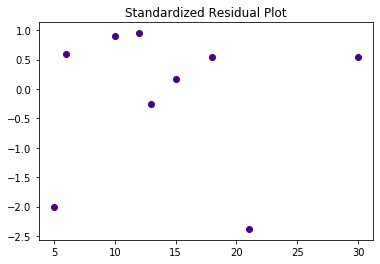

In [7]:
plt.figure()
plt.scatter(tbl['Experience'],rsdl, color = "indigo")
plt.title('Standardized Residual Plot')

### Quantile plot of resiuals

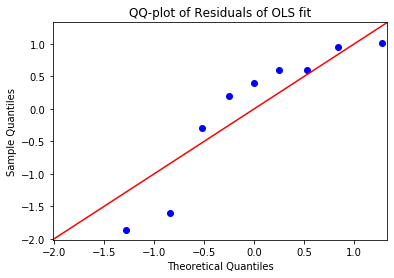

In [8]:
rsd = rgr.resid
p = sm.ProbPlot(rsd,stats.norm, fit = True)
fgr = p.qqplot(line = '45')
h = plt.title('QQ-plot of Residuals of OLS fit')
plt.show()

In [9]:
# creating dummies for the categorical data
dms = pd.get_dummies(tbl['Gender'])
dms

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [10]:
# for adding dummies to table and dropping categorical values, i.e, strings
c_var = pd.concat([tbl, dms], axis = 1)
c_var.drop(['Gender','Male'], inplace = True, axis = 1)

In [11]:
fr = sm.OLS(c_var['Salary'], sm.add_constant(c_var[['Female']])).fit()
print(fr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 02 Jul 2020   Prob (F-statistic):              0.389
Time:                        12:51:19   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

C:\Users\tyagir01\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [58]:
# now adding 'experience' as a factor in the regression
K_var = pd.concat([tbl, dms], axis = 1)
K_var.drop(['Gender','Male'], inplace = True, axis = 1)
nr = sm.OLS(K_var['Salary'], sm.add_constant(K_var[['Experience','Female']])).fit()
print(nr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.80e-05
Time:                        11:46:52   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0